# Mid term group work

analyse overtime
across categories
both exploration and presentation style

1. the general tendency of the focal variable over time (e.g., the
   trajectory of popularity of the average 'pop' album);
2. the distribution of the focal variable at multiple points in time;
3. the evolution of the focal variable for specific cases (e.g.,
   specific products);
4. the differences/similarities in 1, 2, and 3 across categories of
   entities (e.g., types of products).

the trajectory in the count of ratings received by product across time 
      (since the very first score up to six months later; exclude products whose 
      first score has been posted by less than six months);
  - the association between the trajectory in the count of ratings and 
      product attributes (e.g., product-market category, price);
  - the association between the trajectory in the count of ratings and 
      the timing/pace with which ratings are posted.

The **audience** for this chart is a team of experienced marketing
analysts who want to understand how/why attention (measured in terms of count of
ratings) develops around new products.  The chart is meant to serve both
exploration and presentations goals – analysts will use it (i) to
speculate about the factors that account for the trajectory in the
count of ratings; (ii) to update their client with a PowerPoint alike
slide-show.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.style.use('fivethirtyeight')

<b> Review </b>
- <i>reviewerID </i> - ID of the reviewer, e.g. A2SUAM1J3GNN3B

- <i>asin</i> - ID of the product, e.g. 0000013714
- <i>reviewerName</i> - name of the reviewer
- <i>helpful</i> - helpfulness rating of the review, e.g. 2/3
- <i>reviewText</i> - text of the review
- <i>overall</i> - rating of the product
- <i>summary</i> - summary of the review
- <i>unixReviewTime</i> - time of the review (unix time)
- <i>reviewTime</i> - time of the review (raw)

<b> Metadata </b>
- <i>asin</i> - ID of the product, e.g. 0000031852
- <i>title</i> - name of the product
- <i>price</i> - price in US dollars (at time of crawl)
- <i>imUrl</i> - url of the product image
- <i>related</i> - related products (also bought, also viewed, bought together, buy after viewing)
- <i>salesRank</i> - sales rank information
- <i>brand</i> - brand name
- <i>categories</i> - list of categories the product belongs to

In [2]:
##unzip json.gz to json file

#import sh
#sh.gunzip("meta_Digital_Music.json.gz")
#sh.gunzip("Digital_Music.json.gz")

# Digital Music

In [3]:
Meta = 'meta_Digital_Music.json'
Metadata = pd.io.json.json_normalize([json.loads(line) for line in open(Meta)])

In [4]:
Rev = 'Digital_Music.json'
Review = pd.io.json.json_normalize([json.loads(line) for line in open(Rev)])

In [5]:
Review.head().T

,0,1,2,3,4
asin,0001388703,0001388703,0001388703,0001388703,0001388703
image,NaN,NaN,NaN,NaN,NaN
overall,5,5,5,5,5
reviewText,This is a great cd full of worship favorites!!...,"So creative! Love his music - the words, the ...","Keith Green, gone far to early in his carreer,...",Keith Green had his special comedy style of Ch...,Keith Green / So you wanna go back to Egypt......
reviewTime,"12 22, 2013","09 11, 2013","03 2, 2013","12 2, 2012","01 7, 2012"
reviewerID,A1ZCPG3D3HGRSS,AC2PL52NKPL29,A1SUZXBDZSDQ3A,A3A0W7FZXM0IZW,A12R54MKO17TW0
reviewerName,mark l. massey,Norma Mushen,Herbert W. Shurley,Mary M Raybell,J. Bynum
style.Color:,NaN,NaN,NaN,NaN,NaN
style.Format:,Audio CD,Audio CD,Audio CD,Audio CD,Audio CD
style.Size:,NaN,NaN,NaN,NaN,NaN


In [6]:
Review.loc[:,'count'] =1

In [7]:
Review['overall'].dropna(inplace=True)

In [8]:
gr_asin = Review.groupby('asin')
gr_count = Review.groupby('count')
gr_format = Review.groupby('style.Format:')

In [9]:
countreview = pd.DataFrame(gr_format['count'].aggregate(np.sum))
avg_review = pd.DataFrame(gr_format['overall'].aggregate(np.mean))

df = pd.concat([avg_review,countreview], axis=1)

In [10]:
remove = df[df['count'] < 100 ].index
df.drop(remove,inplace=True)

In [11]:
df.reset_index(inplace=True)

X = df['style.Format:']

Y1 = df['count']
Y2 = df['overall']

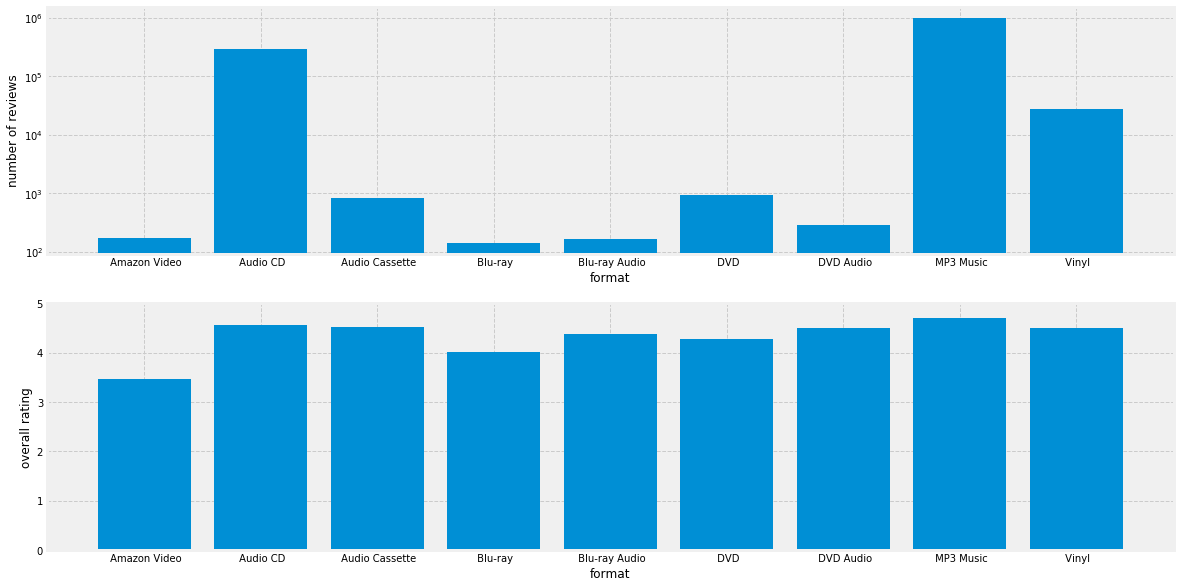

In [12]:
fig = plt.figure(figsize=(18,10))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.bar(X,Y1, log=True)
ax1.set_xlabel('format')
ax1.set_ylabel('number of reviews')
ax1.grid(ls='--')

ax2.bar(X,Y2)
ax2.set_ylim(0,5)
ax2.set_xlabel('format')
ax2.set_ylabel('overall rating')
ax2.grid(ls='--')

In [13]:
Review.loc[:,'timestamp'] = pd.to_datetime(
    Review['reviewTime'],
    format = '%m %d, %Y'
)

In [14]:
Review.loc[:,'month'] = Review['timestamp'].dt.month
Review.loc[:,'year'] = Review['timestamp'].dt.year

In [15]:
gr_year = Review.groupby(['style.Format:','year'])

In [16]:
df2 = pd.DataFrame(gr_year['overall'].agg(np.mean))

df2.drop(remove,inplace=True)
df2.reset_index(inplace=True)

In [17]:
df2.head(10)

,style.Format:,year,overall
0,Amazon Video,2010,3.600000
1,Amazon Video,2011,2.200000
2,Amazon Video,2012,3.857143
3,Amazon Video,2013,3.368421
4,Amazon Video,2014,3.562500
5,Amazon Video,2015,3.723404
6,Amazon Video,2016,3.727273
7,Amazon Video,2017,3.277778
8,Amazon Video,2018,2.750000
9,Audio CD,1997,5.000000


In [18]:
x = np.arange(1997,2019,1)
x

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [19]:
x = df2['year']
y = df2['overall']

In [20]:

x1 = x[:9]
y1 = y[:9]

x2 = x[9:31]
y2 = y[9:31]

x3 = x[31:50]
y3 = y[31:50]

x4 = x[50:60]
y4 = y[50:60]

x5 = x[60:67]
y5 = y[60:67]

x6 = x[67:79]
y6 = y[67:79]

x7 = x[79:92]
y7 = y[79:92]

x8 = x[92:107]
y8 = y[92:107]

x9 = x[107:]
y9 = y[107:]

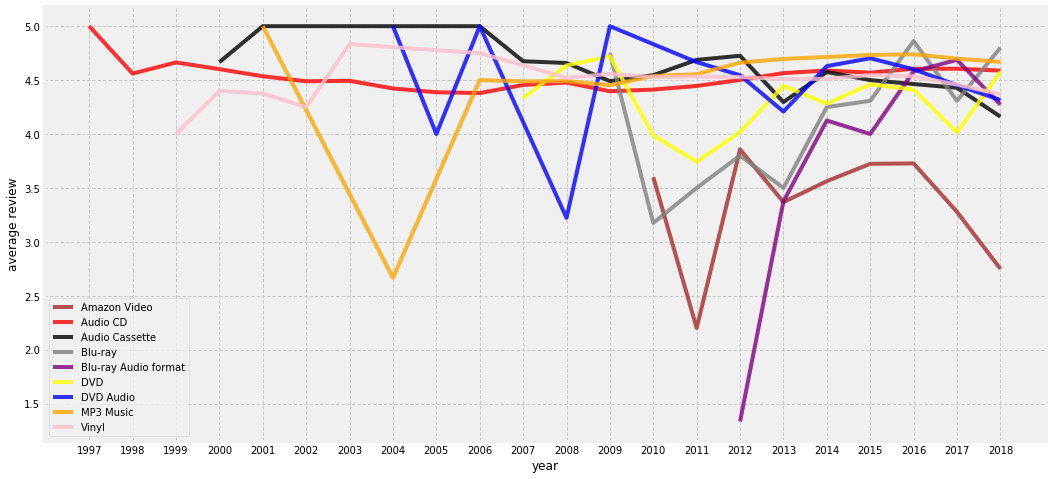

In [21]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(111,xticks=list(np.arange(1997,2019,1)), xticklabels= list(np.arange(1997,2019,1)))

ax.plot(x1,y1,c='brown', alpha=0.8, label='Amazon Video')
ax.plot(x2,y2, c='red', alpha=0.8,label='Audio CD')
ax.plot(x3,y3, c='black', alpha=0.8,label='Audio Cassette')
ax.plot(x4,y4, c='grey', alpha=0.8,label='Blu-ray')
ax.plot(x5,y5, c='purple', alpha=0.8,label='Blu-ray Audio format')
ax.plot(x6,y6, c='yellow', alpha=0.8,label='DVD')
ax.plot(x7,y7, c='blue', alpha=0.8,label='DVD Audio')
ax.plot(x8,y8, c='orange', alpha=0.8,label='MP3 Music')
ax.plot(x9,y9, c='pink', alpha=0.8,label='Vinyl')


ax.set_xlabel('year')
ax.set_ylabel('average review')
ax.legend(loc='best')
ax.grid(ls='--')


plt.show()

In [22]:
df3 = pd.DataFrame(gr_year['count'].agg(np.sum))

df3.drop(remove,inplace=True)
df3.reset_index(inplace=True)

In [23]:
df3

,style.Format:,year,count
0,Amazon Video,2010,5
1,Amazon Video,2011,5
2,Amazon Video,2012,7
3,Amazon Video,2013,19
4,Amazon Video,2014,32
5,Amazon Video,2015,47
6,Amazon Video,2016,22
7,Amazon Video,2017,18
8,Amazon Video,2018,16
9,Audio CD,1997,3


In [24]:
x = df3['year']
y = df3['count']

In [25]:

x1 = x[:9]
y1 = y[:9]

x2 = x[9:31]
y2 = y[9:31]

x3 = x[31:50]
y3 = y[31:50]

x4 = x[50:60]
y4 = y[50:60]

x5 = x[60:67]
y5 = y[60:67]

x6 = x[67:79]
y6 = y[67:79]

x7 = x[79:92]
y7 = y[79:92]

x8 = x[92:107]
y8 = y[92:107]

x9 = x[107:]
y9 = y[107:]

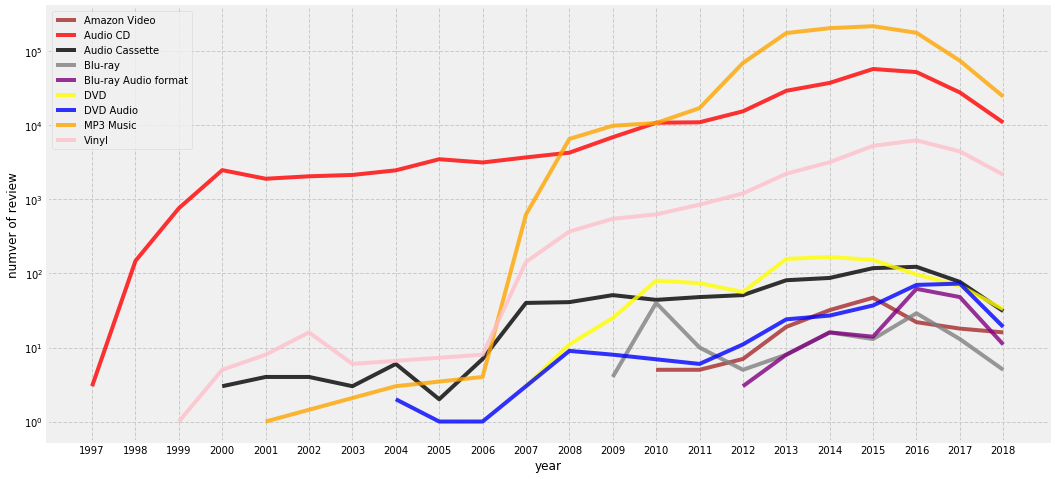

In [26]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(111,xticks=list(np.arange(1997,2019,1)), xticklabels= list(np.arange(1997,2019,1)))

ax.plot(x1,y1,c='brown', alpha=0.8, label='Amazon Video')
ax.plot(x2,y2, c='red', alpha=0.8,label='Audio CD')
ax.plot(x3,y3, c='black', alpha=0.8,label='Audio Cassette')
ax.plot(x4,y4, c='grey', alpha=0.8,label='Blu-ray')
ax.plot(x5,y5, c='purple', alpha=0.8,label='Blu-ray Audio format')
ax.plot(x6,y6, c='yellow', alpha=0.8,label='DVD')
ax.plot(x7,y7, c='blue', alpha=0.8,label='DVD Audio')
ax.plot(x8,y8, c='orange', alpha=0.8,label='MP3 Music')
ax.plot(x9,y9, c='pink', alpha=0.8,label='Vinyl')


ax.set_yscale('log')
ax.set_xlabel('year')
ax.set_ylabel('numver of review')
ax.legend(loc='best')
ax.grid(ls='--')


plt.show()

In [27]:
y1 = np.cumsum(y1)
y2 = np.cumsum(y2)
y3 = np.cumsum(y3)
y4 = np.cumsum(y4)
y5 = np.cumsum(y5)
y6 = np.cumsum(y6)
y7 = np.cumsum(y7)
y8 = np.cumsum(y8)
y9 = np.cumsum(y9)

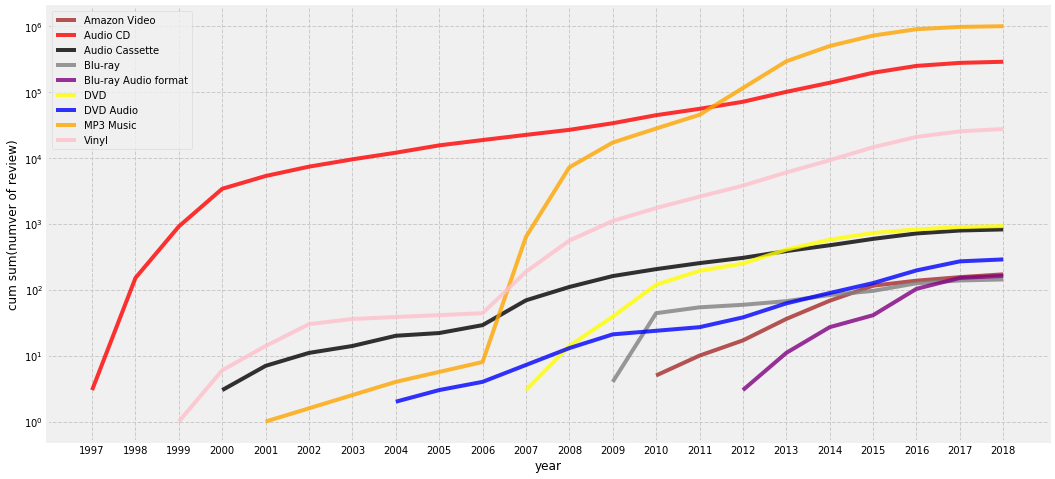

In [28]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(111,xticks=list(np.arange(1997,2019,1)), xticklabels= list(np.arange(1997,2019,1)))

ax.plot(x1,y1,c='brown', alpha=0.8, label='Amazon Video')
ax.plot(x2,y2, c='red', alpha=0.8,label='Audio CD')
ax.plot(x3,y3, c='black', alpha=0.8,label='Audio Cassette')
ax.plot(x4,y4, c='grey', alpha=0.8,label='Blu-ray')
ax.plot(x5,y5, c='purple', alpha=0.8,label='Blu-ray Audio format')
ax.plot(x6,y6, c='yellow', alpha=0.8,label='DVD')
ax.plot(x7,y7, c='blue', alpha=0.8,label='DVD Audio')
ax.plot(x8,y8, c='orange', alpha=0.8,label='MP3 Music')
ax.plot(x9,y9, c='pink', alpha=0.8,label='Vinyl')

ax.set_yscale('log')
ax.set_xlabel('year')
ax.set_ylabel('cum sum(numver of review)')
ax.legend(loc='best')
ax.grid(ls='--')


plt.show()

In [29]:
Metadata.head()

,also_buy,also_view,asin,brand,category,date,description,details,feature,image,main_cat,price,rank,title
0,"[B000002UEN, B000008LD5, B01J804JKE, 747403435...","[B000002UEN, B000008LD5, 7474034352, B000008LD...",0001377647,John Michael Talbot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$18.99,"58,291inCDsVinyl(",Master Collection Volume One
1,"[5558154950, B00014K5V4]","[B000008KJ3, B000008KJ0, 5558154950, B000UN8KZ...",0001529145,Second Chapter of Acts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"93,164inCDsVinyl(",Hymns Collection: Hymns 1 & 2
2,"[B00004RC05, B003H8F4NA, B003ZFVHPO, B003JMP1Z...","[B003H8F4NA, B003ZFVHPO, B003JMP1ZK, B00004RC0...",0001527134,Don Francisco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"875,825inCDsVinyl(",Early Works - Don Francisco
3,"[B0000275QQ, 0001393774, 0001388312, B0016CP2G...","[B00000I7JO, B0016CP2GS, 0001393774, B0000275Q...",0001388703,Keith Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$13.01,"203,263inCDsVinyl(",So You Wanna Go Back to Egypt
4,"[B0002N4JP2, 0760131694, B00002EQ79, B00150K8J...","[B0002N4JP2, 0760131694, B00150K8JC, B003MTXNV...",0001526146,Dallas Holm,NaN,NaN,[1. Losing Game 2. I Can't Wait 3. Didn't He S...,NaN,NaN,NaN,NaN,NaN,"399,269inCDsVinyl(",Early Works - Dallas Holm


# Video Games

In [30]:
Rev = 'Video_Games.json'
Review = pd.io.json.json_normalize([json.loads(line) for line in open(Rev)])

In [31]:
Review.head().T

,0,1,2,3,4
asin,0439381673,0439381673,0439381673,0439381673,0439381673
image,NaN,NaN,NaN,NaN,NaN
overall,1,3,4,1,4
reviewText,I used to play this game years ago and loved i...,The game itself worked great but the story lin...,I had to learn the hard way after ordering thi...,The product description should state this clea...,I would recommend this learning game for anyon...
reviewTime,"06 9, 2014","05 10, 2014","02 7, 2014","02 7, 2014","01 16, 2014"
reviewerID,A21ROB4YDOZA5P,A3TNZ2Q5E7HTHD,A1OKRM3QFEATQO,A2XO1JFCNEYV3T,A19WLPIRHD15TH
reviewerName,Mary M. Clark,Sarabatya,Amazon Customer,ColoradoPartyof5,Karen Robinson
style.Color Name:,NaN,NaN,NaN,NaN,NaN
style.Color:,NaN,NaN,NaN,NaN,NaN
style.Configuration:,NaN,NaN,NaN,NaN,NaN


In [32]:
Review.loc[:,'timestamp'] = pd.to_datetime(
    Review['reviewTime'],
    format = '%m %d, %Y'
)

In [33]:
Review.loc[:,'month'] = Review['timestamp'].dt.month
Review.loc[:,'year'] = Review['timestamp'].dt.year

Review.loc[:,'count'] = 1

In [34]:
gr_year = Review.groupby('year')
gr_asin = Review.groupby('asin')

In [35]:
Z = pd.DataFrame(gr_year['count'].agg(np.sum))

In [36]:
Z = Z['count']
Z

year
1997         5
1998         4
1999       935
2000      9963
2001     23073
2002     28506
2003     25565
2004     24938
2005     25525
2006     24538
2007     43701
2008     68145
2009     80698
2010     75709
2011     89368
2012    125290
2013    244725
2014    348814
2015    464848
2016    451521
2017    283319
2018    126159
Name: count, dtype: int64

In [37]:
df = pd.DataFrame(gr_year['overall'].agg(np.mean))

In [38]:
df.reset_index(inplace=True)

In [39]:
df

,year,overall
0,1997,4.000000
1,1998,4.000000
2,1999,4.137968
3,2000,4.098163
4,2001,4.058120
5,2002,4.062689
6,2003,4.027577
7,2004,3.922448
8,2005,3.773751
9,2006,3.753077


In [40]:
x = df['year']
y = df['overall']

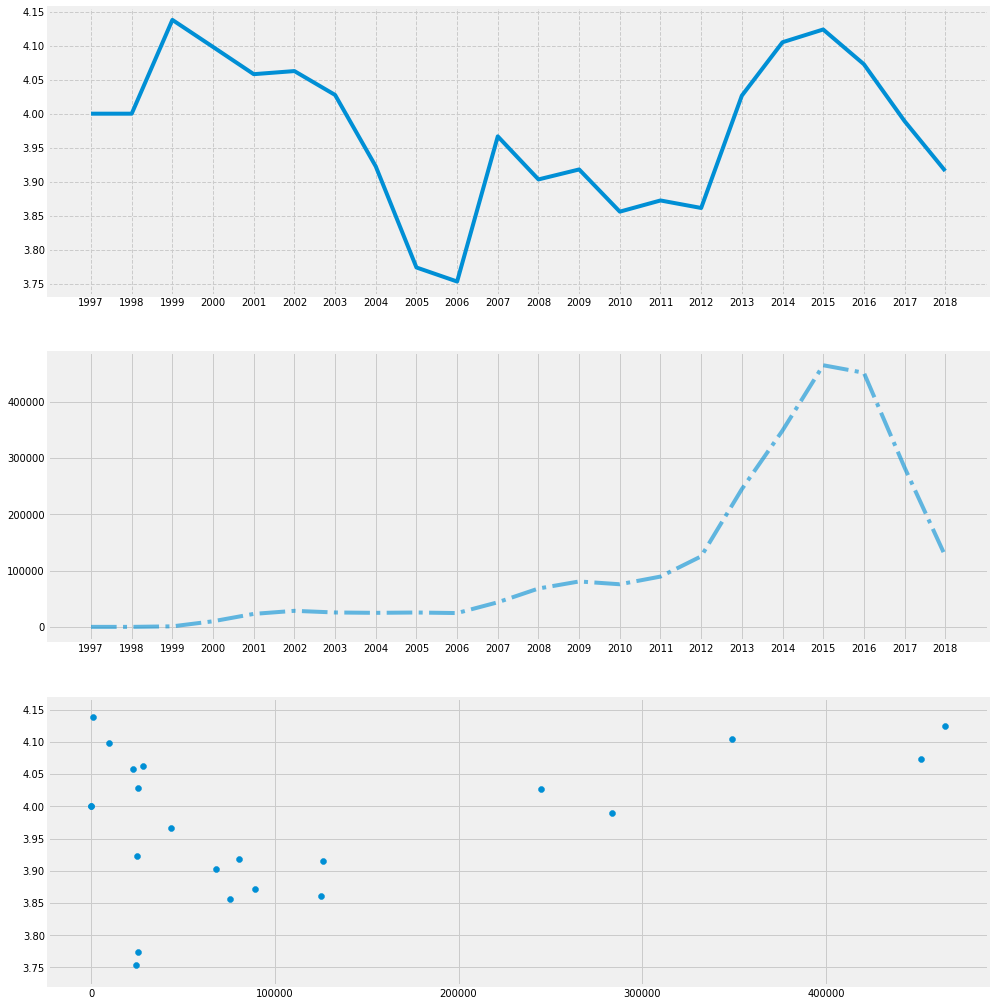

In [41]:
fig = plt.figure(figsize=(15,18))

ax = fig.add_subplot(311, xticks=x, xticklabels=x)

ax.plot(x,y)
ax.grid(ls='--')
#ax.set_ylim(0,5)


ax2 = fig.add_subplot(312, xticks=x, xticklabels=x)
ax2.plot(x,Z,alpha = 0.6,ls='-.')

ax3 = fig.add_subplot(313)
ax3.scatter(Z,y)
#ax3.set_xscale('log')

plt.show()

In [42]:
Meta = 'meta_Video_Games.json'
Metadata = pd.io.json.json_normalize([json.loads(line) for line in open(Meta)])

In [43]:
Metadata.head()

,also_buy,also_view,asin,brand,category,date,description,details,feature,image,...,tech2.Operating System,tech2.Optical Drive Type,tech2.Package Dimensions,tech2.Power Source,tech2.Processor Brand,tech2.Processor Count,tech2.Product Dimensions,tech2.Series,tech2.Voltage,title
0,NaN,NaN,0042000742,Fidelity Electronics,"[Video Games, PC, Games]",NaN,NaN,NaN,NaN,[https://images-na.ssl-images-amazon.com/image...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reversi Sensory Challenger
1,[B00PADROYW],"[B0050SY5BM, B072NQJCW5, B000TI836G, B002SRSQ7...",0078764343,by\n \n EA Games,"[Video Games, Xbox 360, Games, ]",NaN,[Brand new sealed!],NaN,NaN,[https://images-na.ssl-images-amazon.com/image...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medal of Honor: Warfighter - Includes Battlefi...
2,NaN,NaN,0276425316,Nintendo,"[Video Games, Retro Gaming & Microconsoles, Su...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,street fighter 2 II turbo super nintendo snes ...
3,NaN,NaN,0324411812,by\n \n MAS SYSTEMS,"[Video Games, Xbox 360, Accessories, Controlle...",NaN,[MAS's Pro Xbox 360 Stick (Perfect 360 Stick) ...,NaN,[Original PCB used from Xbox 360 Control Pad (...,[https://images-na.ssl-images-amazon.com/image...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Xbox 360 MAS STICK
4,NaN,[B000BCZ7U0],0439335310,by\n \n Advanced Software Pty. Ltd.,"[Video Games, PC, Games, , Grades 2-12, Spelli...",NaN,"[Phonics Alive! 3, The Speller teaches student...",NaN,"[Grades 2-12, Spelling Program, Teaches Spelli...",[https://images-na.ssl-images-amazon.com/image...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Phonics Alive! 3: The Speller


In [44]:
dict = {(i,j) for (i,j) in zip(Metadata['asin'], Metadata['main_cat'])}

In [45]:
Cat = pd.DataFrame(dict, columns=('asin','main_cat'))

In [46]:
Cat.head()

,asin,main_cat
0,B00002STGI,Video Games
1,B006R12E1E,Video Games
2,B00B4WVVHY,Video Games
3,B006NU6ND4,Video Games
4,B0001D1RIU,Video Games


In [47]:
Cat.set_index('asin', inplace=True)

In [48]:
Asin = pd.DataFrame([gr_asin['overall'].agg(np.mean), gr_asin['count'].agg(np.sum)]).transpose()

In [49]:
Asin

,overall,count
asin,,
0042000742,5.000000,1.0
0078764343,4.750000,4.0
0276425316,5.000000,1.0
0324411812,1.000000,1.0
0439335299,3.000000,1.0
0439335310,3.000000,1.0
043933702X,3.857143,7.0
0439339006,2.000000,2.0
0439339960,4.000000,3.0


In [50]:
#outer so that there will be no, Na
DF2 = pd.merge(Asin, Cat, how="outer", on="asin")

In [51]:
DF2.reset_index(inplace=True)

In [52]:
DF2.head()

,asin,overall,count,main_cat
0,0042000742,5.00,1.0,Toys & Games
1,0078764343,4.75,4.0,Video Games
2,0276425316,5.00,1.0,Video Games
3,0324411812,1.00,1.0,Video Games
4,0439335299,3.00,1.0,Video Games


In [53]:
Cat_count = pd.DataFrame(DF2.groupby('main_cat')['count'].agg(np.sum))
Cat_overall = pd.DataFrame(DF2.groupby('main_cat')['overall'].agg(np.mean))

In [54]:
Cat_count.reset_index(inplace=True)

In [55]:
Y1 = Cat_count['count']
Y2 = Cat_overall['overall']
X = Cat_count['main_cat']

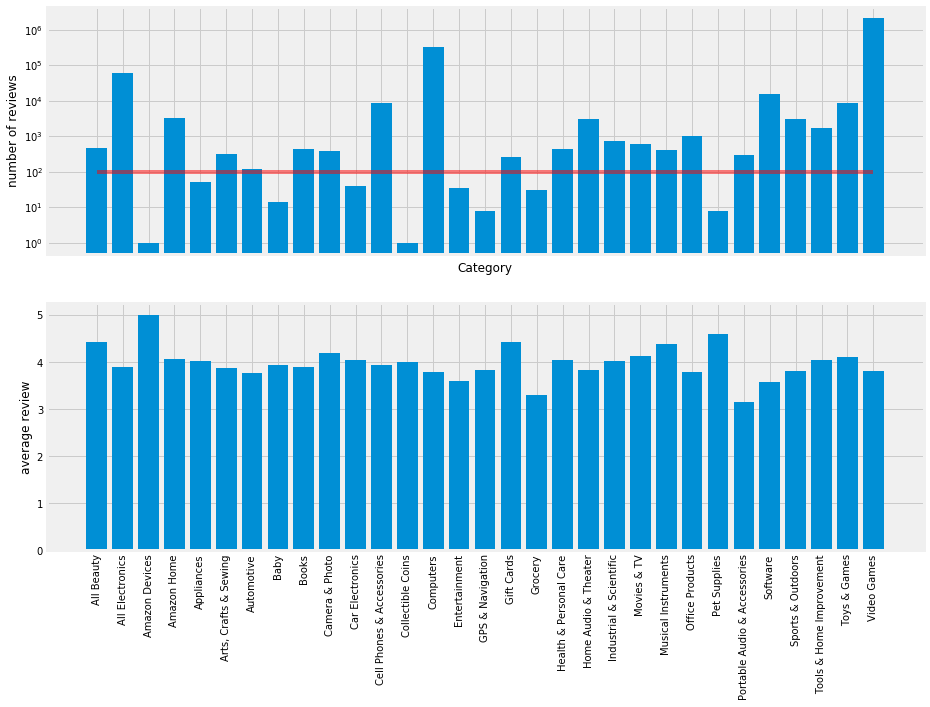

In [56]:
fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(211)


ax.bar(X,Y1)
ax.set_yscale('log')
ax.set_xticklabels('')
ax.set_xlabel('Category')
ax.set_ylabel('number of reviews')
ax.hlines(y=100, xmin=X[0] , xmax=X[30] , colors= 'r', ls='-', alpha=0.5)

ax2 = fig.add_subplot(212)
ax2.bar(X,Y2)
ax2.set_xticklabels(X, rotation='vertical')
ax2.set_ylabel('average review')

plt.show()

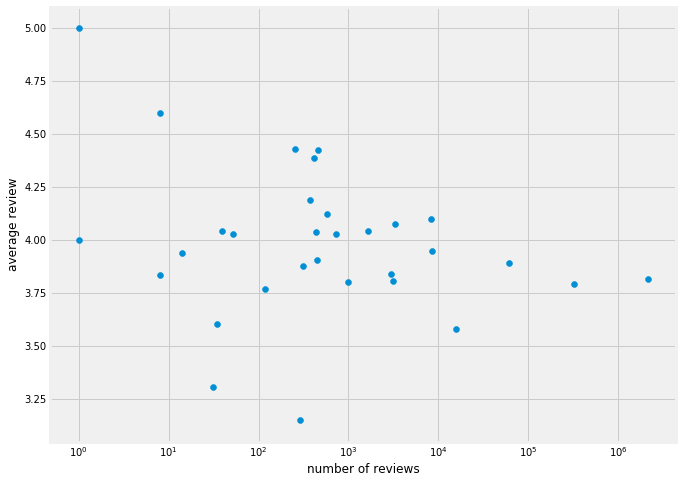

In [57]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111)


ax.scatter(Y1,Y2)
ax.set_xlabel('number of reviews')
ax.set_ylabel('average review')
ax.set_xscale('log')

plt.show()